<a href="https://colab.research.google.com/github/NisargSampat/SEPM_LAB_T21_87/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Womens Clothing E-Commerce Reviews.csv to Womens Clothing E-Commerce Reviews (4).csv


# Analysis (Using Vader & TextBlob) - Lexicon Based Approach


In [2]:
import pandas as pd
df=pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [3]:
df.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [4]:
import numpy as np
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower(), language='english')

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Remove punctuation and special characters
    tokens = [word for word in tokens if word.isalnum()]

    # Join the tokens back into a string
    preprocessed_text = " ".join(tokens)
    return preprocessed_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
# replace missing values with empty strings
df['Review Text']= df['Review Text'].replace(np.nan, '', regex=True)
#iterate over to get sentiment scores
sentiment_scores_vader_pos=[]
sentiment_scores_vader_neg=[]
sentiment_scores_textblob=[]
sentiment_scores=[]
for text in df['Review Text']:
  scores=sid.polarity_scores(text)
  scoresNew=TextBlob(text).sentiment.polarity
  scoresFinal=(scores['compound']+scoresNew)/2
  sentiment_scores_textblob.append(scoresNew)
  sentiment_scores_vader_pos.append(scores['pos'])
  sentiment_scores_vader_neg.append(scores['neg'])
  sentiment_scores.append(scoresFinal)
#add sentiment scores as new column
df['Sentiment Score(Vader pos)']=sentiment_scores_vader_pos
df['Sentiment Score(Vader neg)']=sentiment_scores_vader_neg
df['Sentiment Score(TextBlob)']=sentiment_scores_textblob
df['Sentiment Score']=sentiment_scores

In [7]:
def get_sentiment_label(row):
  if row['Sentiment Score(TextBlob)'] < 0.1 :
    return 'Negative'
  else:
    if row['Sentiment Score'] >= 0.05:
      return 'Positive'
    elif row['Sentiment Score'] <= -0.05:
      return 'Negative'
    else:
      return 'Neutral'

df['Sentiment Label'] = df.apply(get_sentiment_label, axis=1)

In [8]:
df.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment Score(Vader pos),Sentiment Score(Vader neg),Sentiment Score(TextBlob),Sentiment Score,Sentiment Label
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.728,0.000,0.633333,0.763267,Positive
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.336,0.000,0.339583,0.656242,Positive
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.181,0.027,0.073675,0.508187,Negative
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.434,0.226,0.550000,0.561350,Positive
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.300,0.000,0.512891,0.720995,Positive
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0.147,0.000,0.178750,0.560325,Positive
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,0.096,0.023,0.133750,0.467075,Positive
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits,0.053,0.046,0.171635,0.040367,Neutral
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,0.182,0.000,0.002500,0.360000,Negative
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses,0.126,0.120,0.204200,-0.084100,Negative


# Conclusion (using Vader and Textblob)


*   Textblob treats negation words with same polarity i.e 1.
*  Due to this shortcoming, Vader is a better choice than TextBlob, but Vader throws a lot of neutral tones over pos or neg tones. So, in situations where neither pos nor neg are a majority (i.e neutral is a majority), we need further analysis methods to determine the tone of the review.
*   Refer to article [here](https://www.analyticsvidhya.com/blog/2021/10/sentiment-analysis-with-textblob-and-vader/)




# Further Analysis (using TF-IDF Method and others)

In [9]:
from google.colab import files
import pandas as pd
uploaded = files.upload()


Saving Womens Clothing E-Commerce Reviews.csv to Womens Clothing E-Commerce Reviews (5).csv


In [10]:
reviews_df=pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
import numpy as np
import nltk
reviews_df['Review Text']= reviews_df['Review Text'].replace(np.nan, '', regex=True)
reviews_df.head(10)



,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [11]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')


def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data, and segment train and test data
reviews_df = reviews_df.sample(frac = 0.1, replace = False, random_state=42)
reviews_df["review_clean"] = reviews_df["Review Text"].apply(lambda x: clean_text(x))
reviews_df.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,review_clean
1297,1297,1095,34,Size up if busty,I agree with the other reviewer that the color...,4,1,19,General,Dresses,Dresses,agree reviewer color pink person subtle though...
7228,7228,903,57,Snap front hoodie,I have many sweaters but i bought this during ...,4,1,0,General Petite,Tops,Fine gauge,many sweater buy sale soft comfortable
21410,21410,830,56,Adorable,Beautiful top but runs a whole size small. gav...,4,1,3,General,Tops,Blouses,beautiful top run whole size small give daught...
8358,8358,1047,36,Fraying after 2 wears!,I loved these pants.they are so comfortable. h...,3,0,3,General Petite,Bottoms,Pants,love pants.they comfortable however wear twice...
20840,20840,1110,30,Fabulous material....,I ordered this dress in a petite but it arrive...,5,1,0,General,Dresses,Dresses,ordered dress petite arrive regular rest fit m...
8193,8193,820,36,Run and buy.....,Such a cute shirt! i picked up the white-with-...,5,1,11,General Petite,Tops,Blouses,cute shirt pick white-with-flowers show online...
17261,17261,1059,37,NaN,Had to send back for exchange. way too big. i'...,3,1,2,General Petite,Bottoms,Pants,send back exchange way big excite get small si...
6072,6072,1092,39,Sbags easily,I liked this dress but wasn't sure about the c...,5,1,5,General,Dresses,Dresses,liked dress sure color try anyway originally t...
10801,10801,22,30,Please bring this shirt back!!!,This is my favorite shirt ever. i've had it fo...,5,1,0,General,Tops,Knits,favorite shirt ever year still look great plea...
15105,15105,394,30,NaN,,5,1,0,Initmates,Intimate,Swim,


In [12]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [13]:
# add sentiment anaylsis columns
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["Review Text"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)
reviews_df.head(10)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,review_clean,neg,neu,pos,compound
1297,1297,1095,34,Size up if busty,I agree with the other reviewer that the color...,4,1,19,General,Dresses,Dresses,agree reviewer color pink person subtle though...,0.000,0.843,0.157,0.9175
7228,7228,903,57,Snap front hoodie,I have many sweaters but i bought this during ...,4,1,0,General Petite,Tops,Fine gauge,many sweater buy sale soft comfortable,0.000,0.756,0.244,0.7046
21410,21410,830,56,Adorable,Beautiful top but runs a whole size small. gav...,4,1,3,General,Tops,Blouses,beautiful top run whole size small give daught...,0.000,0.513,0.487,0.8588
8358,8358,1047,36,Fraying after 2 wears!,I loved these pants.they are so comfortable. h...,3,0,3,General Petite,Bottoms,Pants,love pants.they comfortable however wear twice...,0.063,0.817,0.120,0.7804
20840,20840,1110,30,Fabulous material....,I ordered this dress in a petite but it arrive...,5,1,0,General,Dresses,Dresses,ordered dress petite arrive regular rest fit m...,0.000,0.683,0.317,0.9873
8193,8193,820,36,Run and buy.....,Such a cute shirt! i picked up the white-with-...,5,1,11,General Petite,Tops,Blouses,cute shirt pick white-with-flowers show online...,0.000,0.820,0.180,0.9259
17261,17261,1059,37,NaN,Had to send back for exchange. way too big. i'...,3,1,2,General Petite,Bottoms,Pants,send back exchange way big excite get small si...,0.000,0.749,0.251,0.7708
6072,6072,1092,39,Sbags easily,I liked this dress but wasn't sure about the c...,5,1,5,General,Dresses,Dresses,liked dress sure color try anyway originally t...,0.024,0.830,0.146,0.9106
10801,10801,22,30,Please bring this shirt back!!!,This is my favorite shirt ever. i've had it fo...,5,1,0,General,Tops,Knits,favorite shirt ever year still look great plea...,0.000,0.581,0.419,0.9059
15105,15105,394,30,NaN,,5,1,0,Initmates,Intimate,Swim,,0.000,0.000,0.000,0.0000


In [14]:
# add number of characters column
reviews_df["nb_chars"] = reviews_df["Review Text"].apply(lambda x: len(x))

# add number of words column
reviews_df["nb_words"] = reviews_df["Review Text"].apply(lambda x: len(x.split(" ")))
reviews_df.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,review_clean,neg,neu,pos,compound,nb_chars,nb_words
1297,1297,1095,34,Size up if busty,I agree with the other reviewer that the color...,4,1,19,General,Dresses,Dresses,agree reviewer color pink person subtle though...,0.000,0.843,0.157,0.9175,500,89
7228,7228,903,57,Snap front hoodie,I have many sweaters but i bought this during ...,4,1,0,General Petite,Tops,Fine gauge,many sweater buy sale soft comfortable,0.000,0.756,0.244,0.7046,91,18
21410,21410,830,56,Adorable,Beautiful top but runs a whole size small. gav...,4,1,3,General,Tops,Blouses,beautiful top run whole size small give daught...,0.000,0.513,0.487,0.8588,73,14
8358,8358,1047,36,Fraying after 2 wears!,I loved these pants.they are so comfortable. h...,3,0,3,General Petite,Bottoms,Pants,love pants.they comfortable however wear twice...,0.063,0.817,0.120,0.7804,500,94
20840,20840,1110,30,Fabulous material....,I ordered this dress in a petite but it arrive...,5,1,0,General,Dresses,Dresses,ordered dress petite arrive regular rest fit m...,0.000,0.683,0.317,0.9873,391,84
8193,8193,820,36,Run and buy.....,Such a cute shirt! i picked up the white-with-...,5,1,11,General Petite,Tops,Blouses,cute shirt pick white-with-flowers show online...,0.000,0.820,0.180,0.9259,500,89
17261,17261,1059,37,NaN,Had to send back for exchange. way too big. i'...,3,1,2,General Petite,Bottoms,Pants,send back exchange way big excite get small si...,0.000,0.749,0.251,0.7708,124,23
6072,6072,1092,39,Sbags easily,I liked this dress but wasn't sure about the c...,5,1,5,General,Dresses,Dresses,liked dress sure color try anyway originally t...,0.024,0.830,0.146,0.9106,500,100
10801,10801,22,30,Please bring this shirt back!!!,This is my favorite shirt ever. i've had it fo...,5,1,0,General,Tops,Knits,favorite shirt ever year still look great plea...,0.000,0.581,0.419,0.9059,110,21
15105,15105,394,30,NaN,,5,1,0,Initmates,Intimate,Swim,,0.000,0.000,0.000,0.0000,0,1


In [15]:
!pip install gensim

In [16]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews_df["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = reviews_df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
reviews_df = pd.concat([reviews_df, doc2vec_df], axis=1)


In [17]:
reviews_df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,...,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
1297,1297,1095,34,Size up if busty,I agree with the other reviewer that the color...,4,1,19,General,Dresses,...,0.843,0.157,0.9175,500,89,-0.058469,0.308228,0.605093,-0.561916,-0.134785
7228,7228,903,57,Snap front hoodie,I have many sweaters but i bought this during ...,4,1,0,General Petite,Tops,...,0.756,0.244,0.7046,91,18,-0.057926,0.070598,0.026120,0.071454,-0.061055
21410,21410,830,56,Adorable,Beautiful top but runs a whole size small. gav...,4,1,3,General,Tops,...,0.513,0.487,0.8588,73,14,-0.043229,-0.017906,-0.067137,-0.035000,-0.108344
8358,8358,1047,36,Fraying after 2 wears!,I loved these pants.they are so comfortable. h...,3,0,3,General Petite,Bottoms,...,0.817,0.120,0.7804,500,94,0.213156,0.393923,0.741785,-0.522047,-0.168365
20840,20840,1110,30,Fabulous material....,I ordered this dress in a petite but it arrive...,5,1,0,General,Dresses,...,0.683,0.317,0.9873,391,84,0.116241,0.214908,0.233894,-0.395781,-0.155440


In [18]:
reviews_df.shape


(2349, 23)

In [19]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(reviews_df["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names_out())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews_df.index
reviews_df = pd.concat([reviews_df, tfidf_df], axis=1)

In [20]:
reviews_df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,...,word_xs,word_xsp,word_xx,word_xxs,word_year,word_yellow,word_yes,word_yet,word_zip,word_zipper
1297,1297,1095,34,Size up if busty,I agree with the other reviewer that the color...,4,1,19,General,Dresses,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7228,7228,903,57,Snap front hoodie,I have many sweaters but i bought this during ...,4,1,0,General Petite,Tops,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21410,21410,830,56,Adorable,Beautiful top but runs a whole size small. gav...,4,1,3,General,Tops,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8358,8358,1047,36,Fraying after 2 wears!,I loved these pants.they are so comfortable. h...,3,0,3,General Petite,Bottoms,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20840,20840,1110,30,Fabulous material....,I ordered this dress in a petite but it arrive...,5,1,0,General,Dresses,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


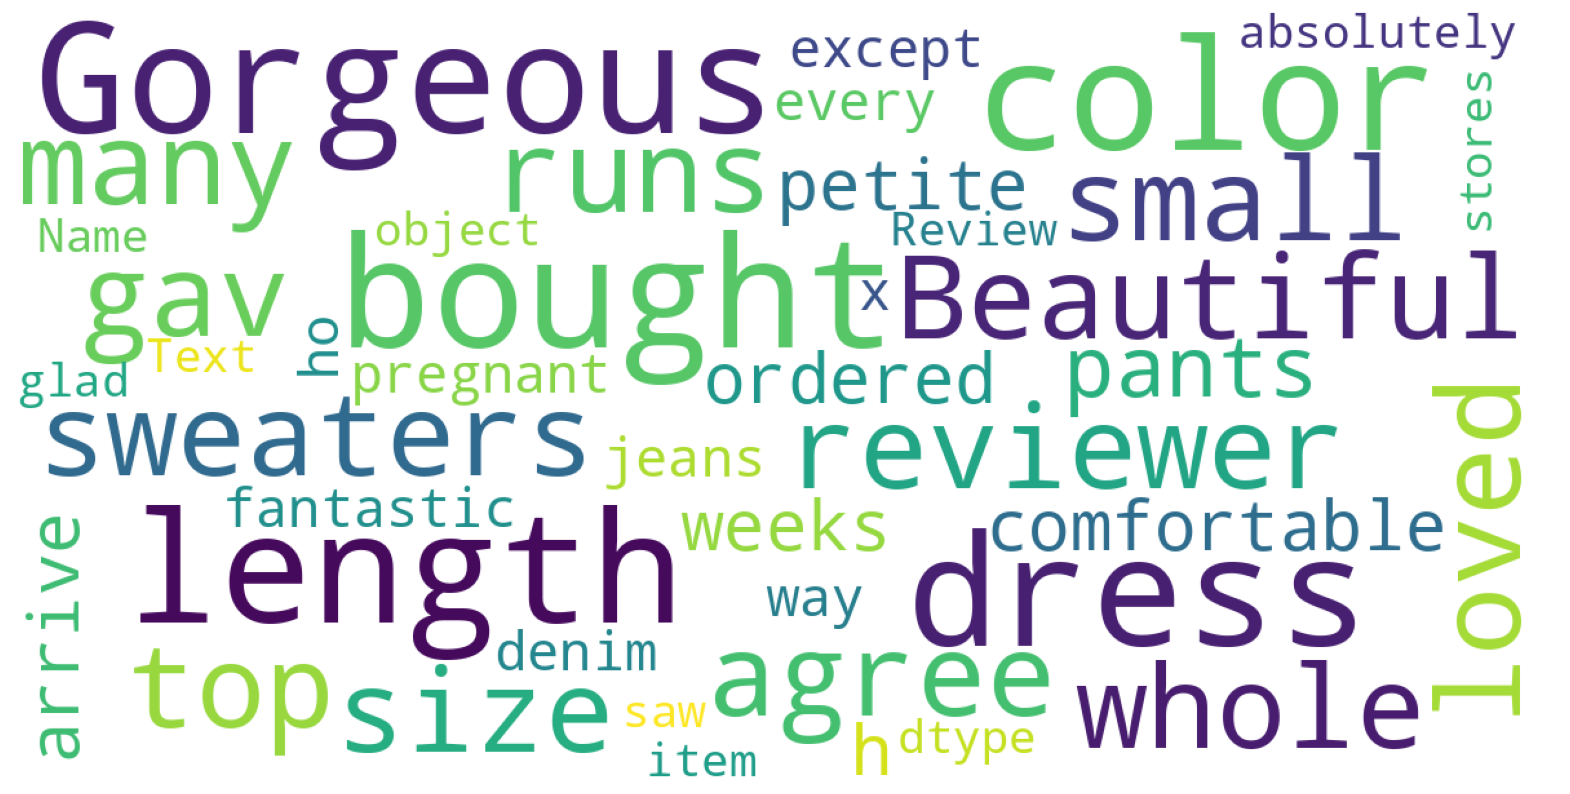

In [21]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40,
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

# print wordcloud
show_wordcloud(reviews_df["Review Text"])

In [22]:
# highest positive sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("pos", ascending = False)[["Review Text", "pos"]].head(10)

,Review Text,pos
23240,"Very comfortable, flattering, washes nicely- l...",0.819
7781,I love this top! fits great n is elegant. grea...,0.761
14632,Beautiful and comfy!!!! love it!,0.755
2641,Love the bright colors! made really well!! sup...,0.752
13038,I love these pants! they fit perfectly and are...,0.705
10072,Love this top! i bought it in 2 colors; it's a...,0.700
18015,Great pants! great fall colors. great for day ...,0.700
5201,This swimsuit is so beautiful and fits wonderf...,0.689
22928,Love this romantic girlie girl dress. so pretty.,0.688
19494,"Love the colors on this adorable, flattering s...",0.678


In [23]:
# lowest negative sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("neg", ascending = False)[["Review Text", "neg"]].head(10)

,Review Text,neg
6108,I returned this item. it was soft. very blah f...,0.305
11055,"I had high hopes for this dress, but unfortuna...",0.303
2992,So disappointing! everything i've owned from b...,0.259
19571,The dress arrived with two large buttons missi...,0.259
16541,Runs small. arms very short and hits in the wr...,0.258
3502,I loved this top so much i bought it in both c...,0.256
9774,This top is exactly what i was hoping for exce...,0.244
18415,Hate i have to return it - way too long-almost...,0.236
4388,"I'm usually a fan of maeve, but this dress is ...",0.235
4028,When i returned this the salesperson asked wha...,0.225


In [24]:
reviews_df["is_bad_review"] = reviews_df["Rating"].apply(lambda x: 1 if x < 3 else 0)
reviews_df["is_bad_review"].value_counts(normalize = True)


,proportion
is_bad_review,
0,0.895275
1,0.104725


/tmp/ipython-input-4231220472.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['compound'], hist = False, label = label)
/tmp/ipython-input-4231220472.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['compound'], hist = False, label = label)


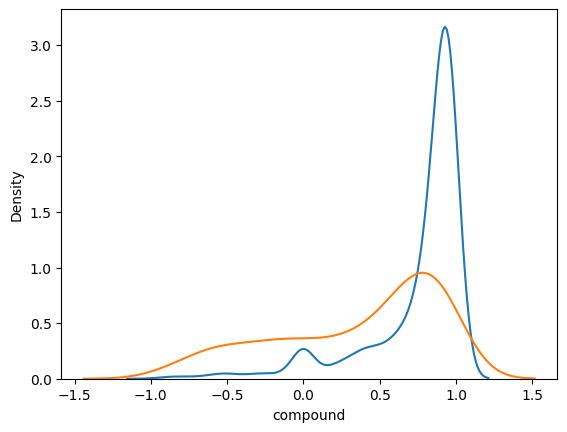

In [25]:
# plot sentiment distribution for positive and negative reviews

import seaborn as sns

for x in [0, 1]:
    subset = reviews_df[reviews_df['is_bad_review'] == x]

    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

In [26]:
# feature selection
label = "is_bad_review"
ignore_cols = ["Unnamed: 0","Age","Positive Feedback Count", label,"Rating","Recommended IND","Clothing ID", "Review Text", "review_clean","Title","Division Name","Department Name", "Class Name"]
features = [c for c in reviews_df.columns if c not in ignore_cols]
print("label:", label)
print("features:", features)

# split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_df[features], reviews_df[label], test_size = 0.20, random_state = 42)


label: is_bad_review
features: ['neg', 'neu', 'pos', 'compound', 'nb_chars', 'nb_words', 'doc2vec_vector_0', 'doc2vec_vector_1', 'doc2vec_vector_2', 'doc2vec_vector_3', 'doc2vec_vector_4', 'word_able', 'word_absolutely', 'word_accentuate', 'word_across', 'word_actually', 'word_add', 'word_addition', 'word_adorable', 'word_adore', 'word_ago', 'word_agree', 'word_allow', 'word_almost', 'word_alone', 'word_along', 'word_already', 'word_also', 'word_although', 'word_always', 'word_amaze', 'word_amazing', 'word_amount', 'word_and', 'word_ankle', 'word_another', 'word_anyone', 'word_anything', 'word_anyway', 'word_appear', 'word_appropriate', 'word_area', 'word_arm', 'word_armhole', 'word_around', 'word_arrive', 'word_athletic', 'word_available', 'word_away', 'word_awesome', 'word_awful', 'word_awkward', 'word_baby', 'word_back', 'word_bad', 'word_bag', 'word_baggy', 'word_band', 'word_barely', 'word_base', 'word_basic', 'word_bc', 'word_beach', 'word_bead', 'word_beautiful', 'word_beautiful

In [28]:
# train a random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
# Also, used an ensemble model with Naive Bayes and Random Forest, gave same results
# estimators = [('nb', GaussianNB()), ('rf', RandomForestClassifier(n_estimators=100, random_state=42))]
# ensemble_model = VotingClassifier(estimators=estimators, voting='hard')  # or 'soft'
# ensemble_model.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
0,neg,0.041090
3,compound,0.040244
2,pos,0.028080
10,doc2vec_vector_4,0.020235
1,neu,0.016871
7,doc2vec_vector_1,0.014538
8,doc2vec_vector_2,0.014447
6,doc2vec_vector_0,0.013249
9,doc2vec_vector_3,0.012797
572,word_return,0.012735


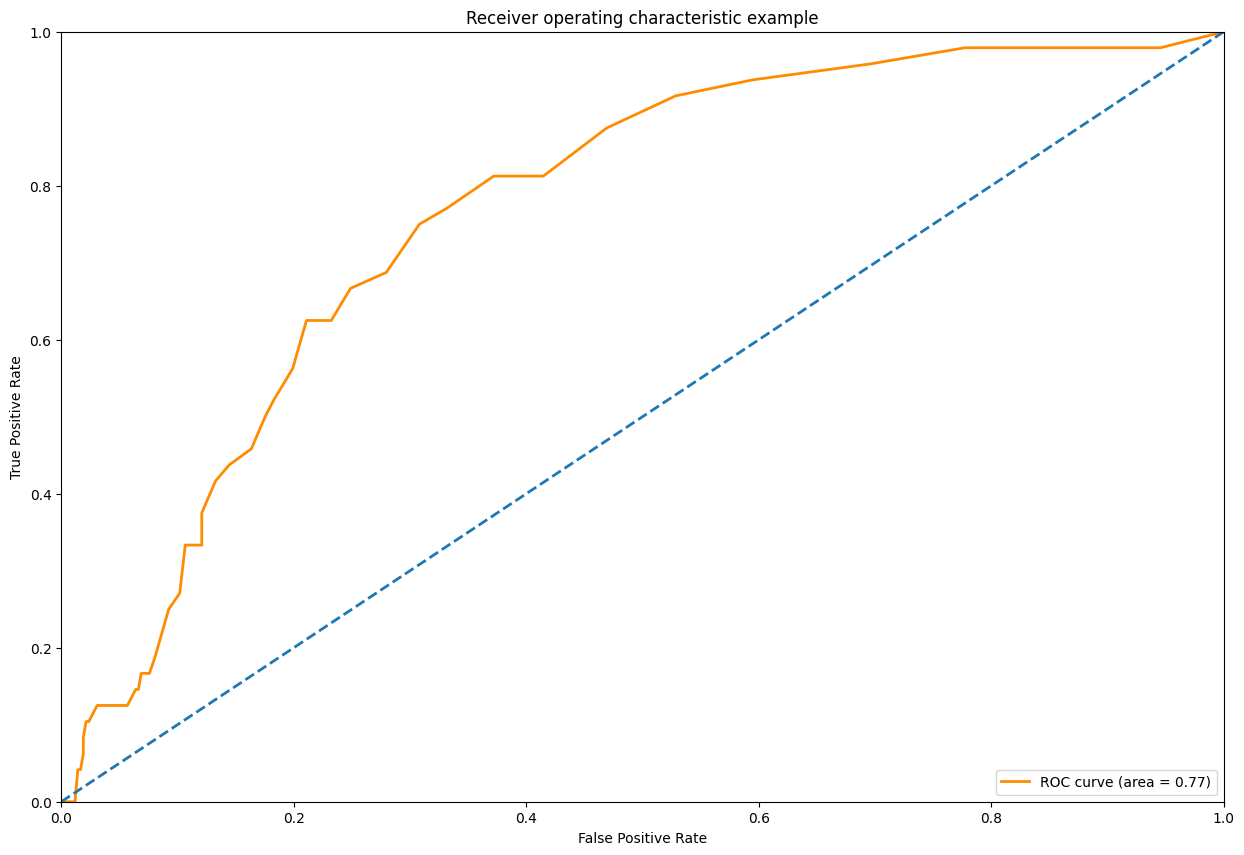

In [29]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.23')

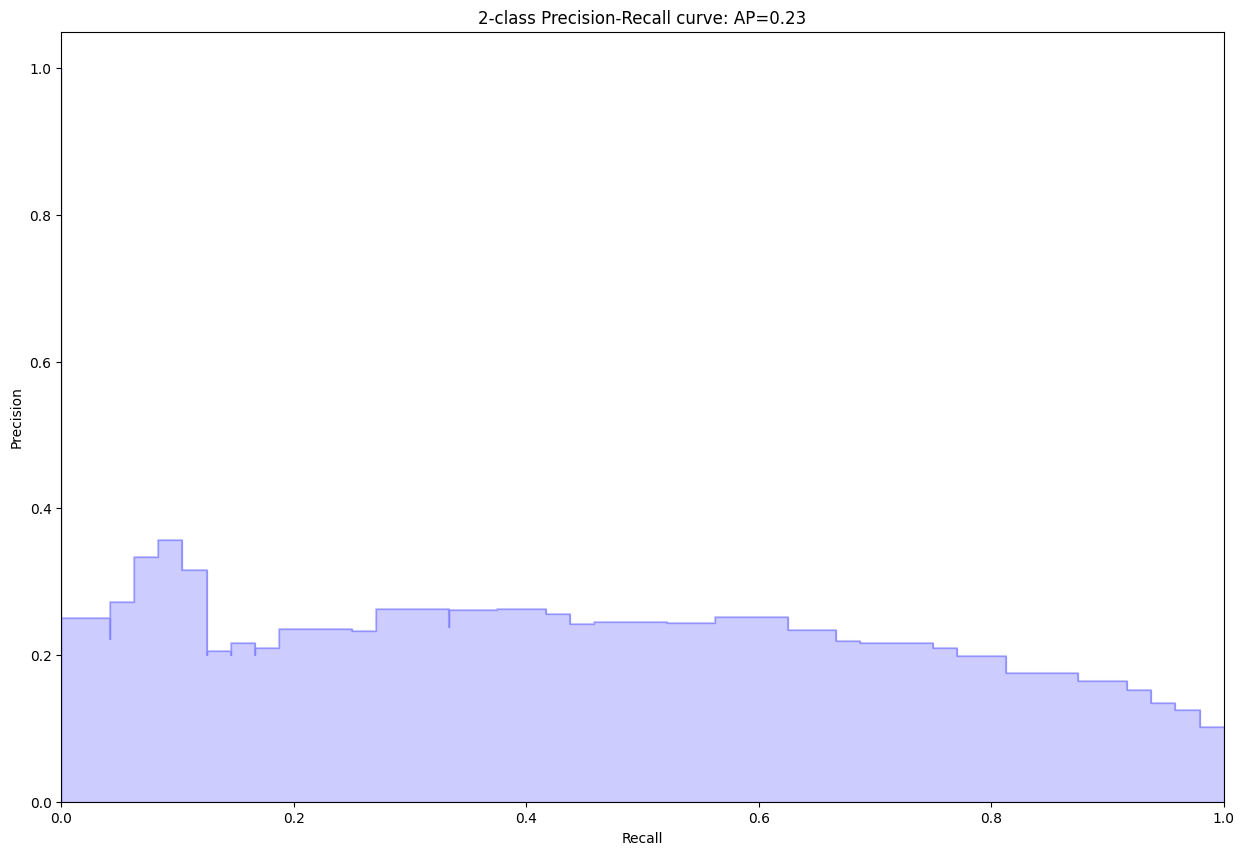

In [30]:
# PR curve
!pip install funcsigs==1.0.2
from sklearn.metrics import average_precision_score, precision_recall_curve
from funcsigs import signature

average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (15, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
